In [305]:
import xarray as xr
import pandas as pd 
%pip install matplotlib
import matplotlib as mpl
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Note: you may need to restart the kernel to use updated packages.


In [306]:

with open("/Users/erictan/Documents/Emissions_API-main2/out_files/data_2024.json", "r") as file:
    data_2024 = json.load(file)

with open("/Users/erictan/Documents/Emissions_API-main2/out_files/data_2023.json", "r") as file:
    data_2023 = json.load(file)

bar1: [193.63368656475402], bar2: [851.7500689572889], bar3: [23171.953464853133], bar4: [14557.353310116427], bar5: [1120.7895022554335], bar6: [741.4975529671419]


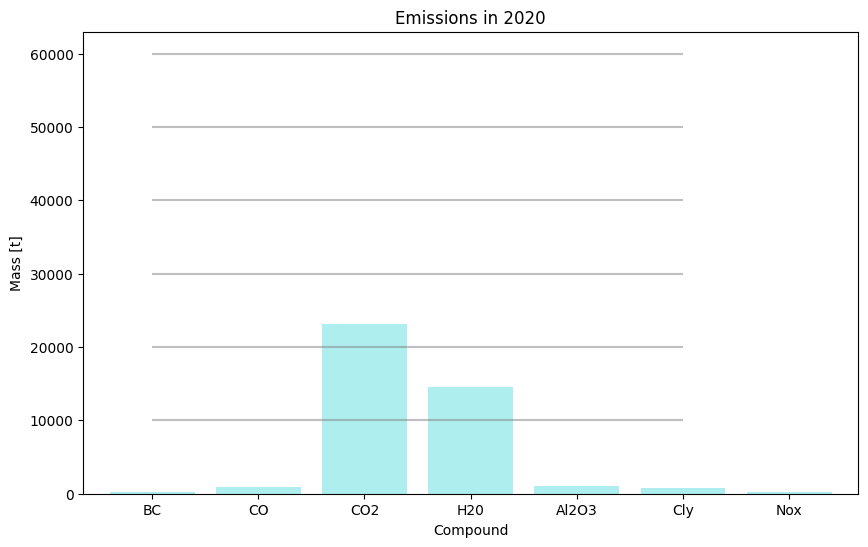

bar1: [237.2918119359648], bar2: [1020.3032134960145], bar3: [28665.973856046763], bar4: [17244.786395139836], bar5: [958.6088738681697], bar6: [634.2012173077127]


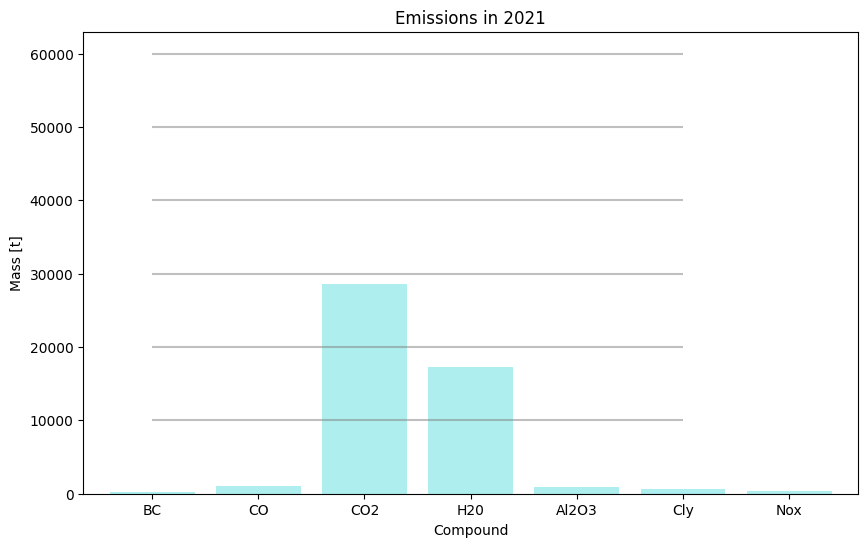

bar1: [355.96848522032053], bar2: [1618.3421912618762], bar3: [43400.48398042003], bar4: [24547.39874448771], bar5: [1912.7319292520199], bar6: [1265.4347230443896]


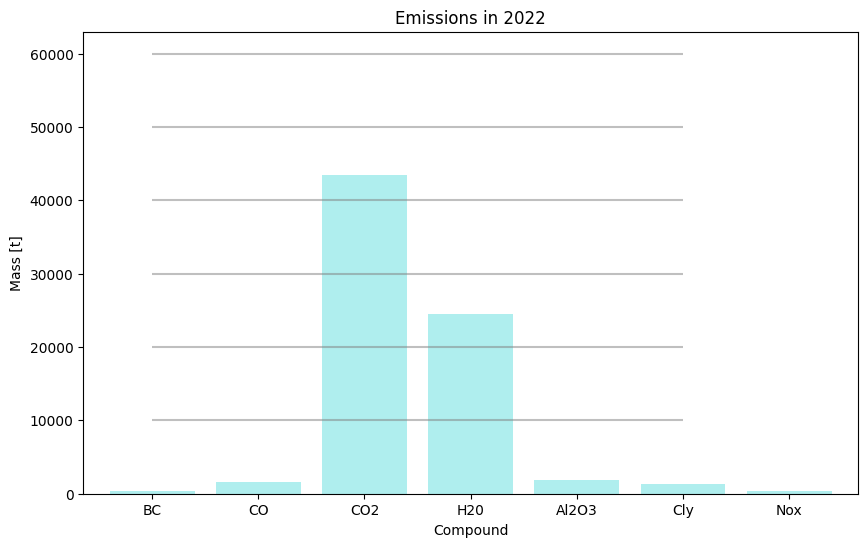

bar1: [492.3060195458083], bar2: [2358.226884138832], bar3: [64873.20667603509], bar4: [33337.30691342558], bar5: [1424.12408997269], bar6: [942.1790865132243]


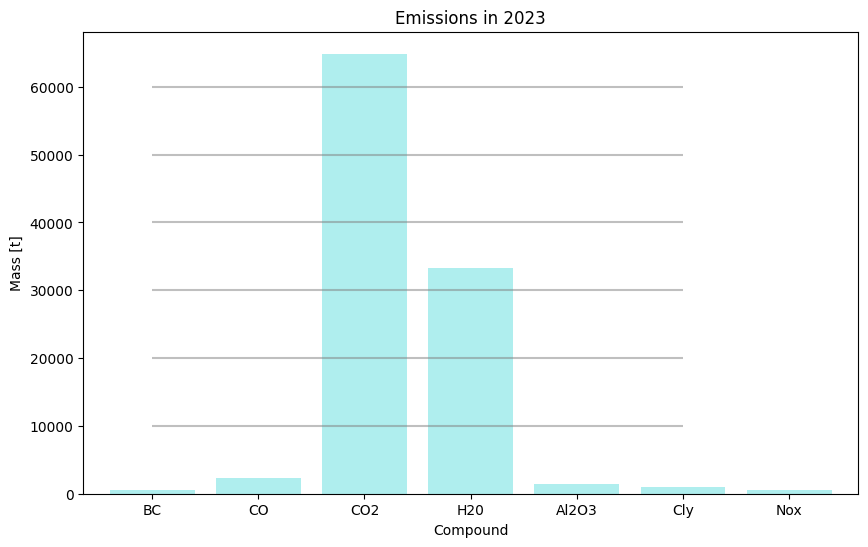

bar1: [596.213065973353], bar2: [2888.9458342314383], bar3: [75729.69833187765], bar4: [35544.83771798317], bar5: [1449.9541061105438], bar6: [959.2679504126359]


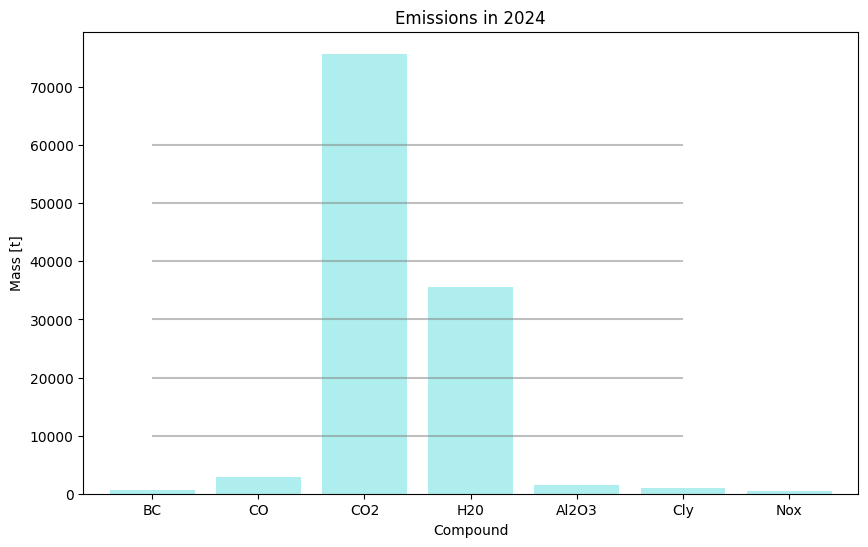

In [307]:
data = {}
emission_total = {}
launch_emission = {}
reentry_emission = {}
emis_data= {}
df ={}

for year in [2020, 2021, 2022, 2023, 2024]:
    file_path = f"/Users/erictan/Documents/Emissions_API-main2/out_files/data_{year}.json"
    with open(file_path, "r") as file:
        data[year] = json.load(file)
    
    
    emission_total[year] = defaultdict(float)
    launch_emission[year] = defaultdict(float)
    reentry_emission[year]= defaultdict(float)

    for date in data[year]:
        for event_type in ["launches"]:
            for event in data[year][date].get(event_type, []):
                emissions = event.get("emissions", {})
                for key, value in emissions.items():
                    if isinstance(value, (int, float)): 
                        emission_total[year][key] += value
                        launch_emission[year][key] += value

    for date in data[year]:
        for event_type in ["reentries"]:
            for event in data[year][date].get(event_type, []):
                emissions = event.get("emissions", {})
                for key, value in emissions.items():
                    if isinstance(value, (int, float)): 
                        emission_total[year][key] += value
                        reentry_emission[year][key] += value

    emis_data[year] = {
            f'BC': [emission_total[year].get('BC', 0)],
            f'CO': [emission_total[year].get('CO', 0)],
            f'CO2': [emission_total[year].get('CO2', 0)],
            f'H2O': [emission_total[year].get('H2O', 0)],
            f'SO2': [emission_total[year].get('SO2', 0)],
            f'NOx': [emission_total[year].get('NOx', 0)],
            f'CH4': [emission_total[year].get('CH4', 0)],
            f'Cly': [emission_total[year].get('Cly', 0)],
            f'Al2O3': [emission_total[year].get('Al2O3', 0)],
            f'HCl': [emission_total[year].get('HCl', 0)],
            f'Cl': [emission_total[year].get('Cl', 0)],
            f'Unablated Mass': [emission_total[year].get('Unablated_Mass', 0)],

            f'BC_reentry': [reentry_emission[year]['BC']],
            f'CO_reentry': [reentry_emission[year]['CO']],
            f'CO2_reentry': [reentry_emission[year]['CO2']],
            f'H2O_reentry': [reentry_emission[year]['H2O']],
            f'SO2_reentry': [reentry_emission[year]['SO2']],
            f'NOx_reentry': [reentry_emission[year]['NOx']],
            f'CH4_reentry': [reentry_emission[year]['CH4']],
            f'CO_reentry': [reentry_emission[year]['CO']],
            f'Cly_reentry': [reentry_emission[year]['Cly']],
            f'Al2O3_reentry': [reentry_emission[year]['Al2O3']],
            f'HCl_reentry': [reentry_emission[year]['HCl']],
            f'Cl_reentry': [reentry_emission[year]['Cl']],
            f'Unablated_Mass_reentry': [reentry_emission[year]['Unablated_Mass']],

            f'BC_launch': [launch_emission[year]['BC']],
            f'CO_launch': [launch_emission[year]['CO']],
            f'CO2_launch': [launch_emission[year]['CO2']],
            f'H2O_launch': [launch_emission[year]['H2O']],
            f'SO2_launch': [launch_emission[year]['SO2']],
            f'NOx_launch': [launch_emission[year]['NOx']],
            f'CH4_launch': [launch_emission[year]['CH4']],
            f'Cly_launch': [launch_emission[year]['Cly']],
            f'Al2O3_launch': [launch_emission[year]['Al2O3']],
            f'HCl_launch': [launch_emission[year]['HCl']],
            f'Cl_launch': [launch_emission[year]['Cl']],
            f'Unablated_Mass_launch': [launch_emission[year]['Unablated_Mass']]
    

        }
            
    df[year] = pd.DataFrame(emis_data[year])
    
    bar1 = [df[year]['BC_launch'][0]]
    bar2 = [df[year]['CO_launch'][0]]
    bar3 = [df[year]['CO2_launch'][0]]
    bar4 = [df[year]['H2O_launch'][0]]
    bar5 = [df[year]['Al2O3_launch'][0]]
    bar6 = [df[year]['Cly_launch'][0]]
    bar7 = [df[year]['NOx_launch'][0]]
    
    
    
    
    
    print(f"bar1: {bar1}, bar2: {bar2}, bar3: {bar3}, bar4: {bar4}, bar5: {bar5}, bar6: {bar6}")
        
    stacked_df = pd.DataFrame({
        "BC": bar1,
        "CO": bar2,
        "CO2": bar3,
        "H20": bar4,
        "Al2O3": bar5,
        "Cly": bar6,
        "Nox": bar7

    })


    stacked_df.T.plot(kind="bar", stacked=True, color = 'paleturquoise', figsize=(10, 6), width=0.8)
    plt.ylabel("Mass [t]")
    plt.xlabel('Compound')
    plt.title(f"Emissions in {year}")
    plt.legend().set_visible(False)
    plt.xticks(rotation=0)
    plt.hlines(y=[10000,20000,30000,40000,50000,60000], xmin=0, xmax=5, colors = 'grey', alpha = 0.5)
    plt.show()




In [308]:

smc_emissions = {}
smc_launch_emission = {}
smc_reentry_emission = {}
smc_emis_data = {}   

for year in [2020, 2021, 2022, 2023, 2024]:
    file_path = f"/Users/erictan/Documents/Emissions_API-main2/out_files/data_{year}.json"
    with open(file_path, "r") as file:
        data[year] = json.load(file)
    
    
    smc_emissions[year] = defaultdict(float)
    smc_launch_emission[year] = defaultdict(float)
    smc_reentry_emission[year]= defaultdict(float)
    

    for date in data[year]:
        for event_type in ["launches"]:
            for event in data[year][date].get(event_type, []):
                smc = event.get("smc", {})
                emissions = event.get("emissions", {})
                if smc == True:
                    for key, value in emissions.items():
                        if isinstance(value, (int, float)): 
                            smc_launch_emission[year][key] += value
                            smc_emissions[year][key] += value

    for date in data[year]:
        for event_type in ["reentries"]:
            for event in data[year][date].get(event_type, []):
                smc = event.get("smc", {})
                emissions = event.get("emissions", {})
                if smc == True:
                    
                    for key, value in emissions.items():
                        if isinstance(value, (int, float)): 
                            smc_reentry_emission[year][key] += value
                            smc_emissions[year][key] += value


                    
              
    smc_emis_data[year] = {
                f'BC': [smc_emissions[year].get('BC', 0)],
                f'CO': [smc_emissions[year].get('CO', 0)],
                f'CO2': [smc_emissions[year].get('CO2', 0)],
                f'H2O': [smc_emissions[year].get('H2O', 0)],
                f'SO2': [smc_emissions[year].get('SO2', 0)],
                f'NOx': [smc_emissions[year].get('NOx', 0)],
                f'CH4': [smc_emissions[year].get('CH4', 0)],
                f'Cly': [smc_emissions[year].get('Cly', 0)],
                f'Al2O3': [smc_emissions[year].get('Al2O3', 0)],
                f'HCl': [smc_emissions[year].get('HCl', 0)],
                f'Cl': [smc_emissions[year].get('Cl', 0)],
                f'Unablated Mass': [smc_emissions[year].get('Unablated_Mass', 0)],

                f'BC_reentry': [smc_reentry_emission[year]['BC']],
                f'CO_reentry': [smc_reentry_emission[year]['CO']],
                f'CO2_reentry': [smc_reentry_emission[year]['CO2']],
                f'H2O_reentry': [smc_reentry_emission[year]['H2O']],
                f'SO2_reentry': [smc_reentry_emission[year]['SO2']],
                f'NOx_reentry': [smc_reentry_emission[year]['NOx']],
                f'CH4_reentry': [smc_reentry_emission[year]['CH4']],
                f'CO_reentry': [smc_reentry_emission[year]['CO']],
                f'Cly_reentry': [smc_reentry_emission[year]['Cly']],
                f'Al2O3_reentry': [smc_reentry_emission[year]['Al2O3']],
                f'HCl_reentry': [smc_reentry_emission[year]['HCl']],
                f'Cl_reentry': [smc_reentry_emission[year]['Cl']],
                f'Unablated_Mass_reentry': [smc_reentry_emission[year]['Unablated_Mass']],

                f'BC_launch': [smc_launch_emission[year]['BC']],
                f'CO_launch': [smc_launch_emission[year]['CO']],
                f'CO2_launch': [smc_launch_emission[year]['CO2']],
                f'H2O_launch': [smc_launch_emission[year]['H2O']],
                f'SO2_launch': [smc_launch_emission[year]['SO2']],
                f'NOx_launch': [smc_launch_emission[year]['NOx']],
                f'CH4_launch': [smc_launch_emission[year]['CH4']],
                f'Cly_launch': [smc_launch_emission[year]['Cly']],
                f'Al2O3_launch': [smc_launch_emission[year]['Al2O3']],
                f'HCl_launch': [smc_launch_emission[year]['HCl']],
                f'Cl_launch': [smc_launch_emission[year]['Cl']],
                f'Unablated_Mass_launch': [smc_launch_emission[year]['Unablated_Mass']]
        

            }
                
df[year] = pd.DataFrame(emis_data[year])
    




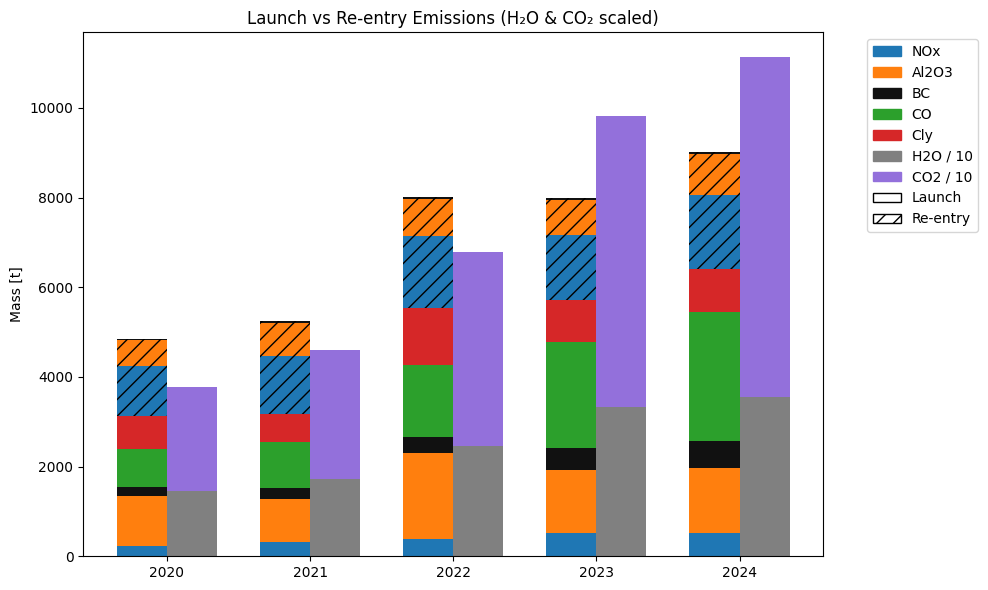

In [324]:




years = sorted(emis_data.keys())
x = np.arange(len(years))
bar_width = 0.35

left_species = ['NOx', 'Al2O3', 'BC', 'CO', 'Cly']
right_species = ['H2O', 'CO2']
scaling = {'H2O': 10, 'CO2': 10}
colors = {
    'NOx': '#1f77b4', 'Al2O3': '#ff7f0e', 'BC': '#111111',
    'CO': '#2ca02c', 'Cly': '#d62728', 'H2O': 'gray', 'CO2': 'mediumpurple'
}

fig, ax = plt.subplots(figsize=(10, 6))
bottom_left = np.zeros(len(years))
bottom_right = np.zeros(len(years))

# Plot left bar (Launch & Reentry for left_species)
for sp in left_species:
    launch_vals = [emis_data[year][f"{sp}_launch"][0] for year in years]
    launch_bars = ax.bar(x - bar_width/2, launch_vals, bar_width, bottom=bottom_left, color=colors[sp], label=sp)
    bottom_left += launch_vals

for sp in left_species:
    reentry_vals = [emis_data[year][f"{sp}_reentry"][0] for year in years]
    reentry_bars = ax.bar(x - bar_width/2, reentry_vals, bar_width, bottom=bottom_left, color=colors[sp])

    for bar in reentry_bars:
        bar.set_hatch('//')

    bottom_left += reentry_vals
  
  

# Plot right bar (Launch & Reentry for right_species with scaling)
for sp in right_species:
    launch_vals = [emis_data[year][f"{sp}_launch"][0] / scaling[sp] for year in years]
    label = f"{sp} / {scaling[sp]}"
    launch_bars = ax.bar(x + bar_width/2, launch_vals, bar_width, bottom=bottom_right, color=colors[sp], label=label)

    bottom_right += launch_vals
    


# Final formatting
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_ylabel("Mass [t]")
ax.set_title("Launch vs Re-entry Emissions (H₂O & CO₂ scaled)")
handles = [plt.Rectangle((0,0),1,1,color=colors[sp]) for sp in left_species + right_species]
labels = left_species + [f"{sp} / {scaling[sp]}" for sp in right_species]
handles += [
    plt.Rectangle((0,0),1,1,facecolor='white', edgecolor='black', label='Launch'),
    plt.Rectangle((0,0),1,1,facecolor='white', edgecolor='black', hatch='//', label='Re-entry')
]
labels += ['Launch', 'Re-entry']
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Proportions of SMC Emissions by Year')

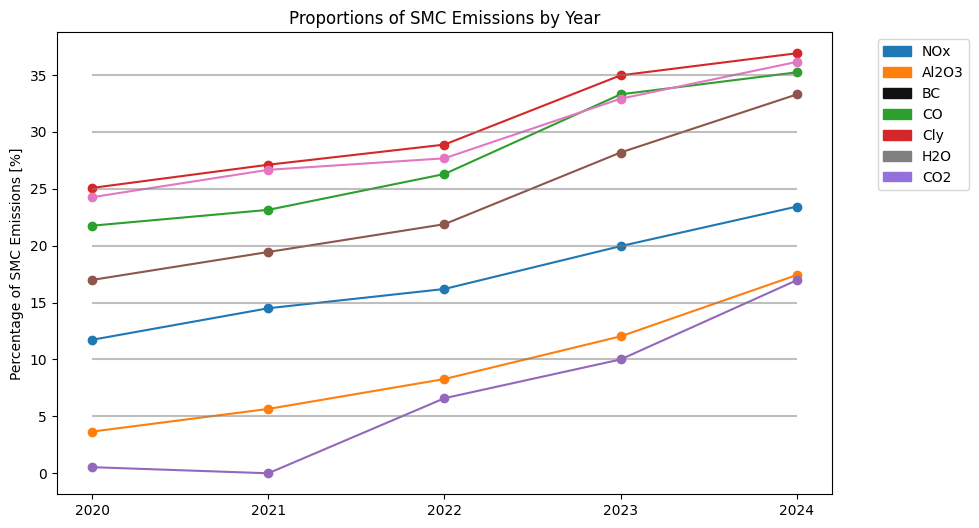

In [331]:
#Year by SMC Proportion Graph (Line Graph)
species = ['NOx', 'Al2O3', 'BC', 'CO', 'Cly','H2O', 'CO2']
fig, ax = plt.subplots(figsize=(10, 6))
years = sorted(smc_emis_data.keys())
x = np.arange(len(years))

for spec in species:
    smc_proportions = []
    for year in years:
        smc_em = smc_emis_data[year].get(spec, 0)
        em = emis_data[year].get(spec, 0)
        total = np.sum([smc_em, em])
        
        if total > 0:
            proportion = (smc_em / total) * 100
            smc_proportions.append(proportion)
        else:
            proportion = 0
        

    plt.plot(years, smc_proportions, marker='o', label=spec)


ax.set_xticks(years)
handles = [plt.Rectangle((0,0),1,1,color=colors[sp]) for sp in species]
labels = species 
handles += [
plt.Rectangle((0,0),1,1,facecolor='white', edgecolor='black', label='Launch'),
plt.Rectangle((0,0),1,1,facecolor='white', edgecolor='black', hatch='//', label='Re-entry')
]


ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.hlines(y=[5,10,15,20,25,30,35], xmin=2020, xmax=2024, colors = 'grey', alpha = 0.5)
ax.set_ylabel("Percentage of SMC Emissions [%]")
ax.set_title("Proportions of SMC Emissions by Year")